# Problem 1

## Problem 1: Part 1

In [27]:
import numpy as np
import math


y = np.array([-1,-1,-1,-1,-1,1,1,1,1,-1])

features = {
    "know author": np.array([0,1,0,1,0,1,0,1,1,1]),
    "is long": np.array([0,1,1,1,1,0,0,0,0,1]),
    "has research": np.array([1,0,1,1,0,1,1,0,1,1]),
    "has grade": np.array([1,1,1,1,0,1,0,0,1,1]),
    "has lottery": np.array([0,0,1,0,0,1,0,0,0,1])
}


# Create a 2D array for all the data
email_data = np.zeros((len(features["know author"]),len(features)+1))

# populate feature data
email_data[:,0] = features["know author"]
email_data[:,1] = features["is long"]    
email_data[:,2] = features["has research"]
email_data[:,3] = features["has grade"]
email_data[:,4] = features["has lottery"]

# populate class data
email_data[:,-1] = y


assert len(y) == 10


p_read = np.count_nonzero(y == 1) / len(y)
p_not_read = np.count_nonzero(y== -1) / len(y)

entropy_y = - p_read * np.log(p_read) - p_not_read * np.log(p_not_read)

print(f"entropy = {entropy_y}")

entropy = 0.6730116670092565


## Problem 1 - Part 2

In [28]:
from utils.infogains import InfoGains

In [29]:
import mltools as ml
my_gains = InfoGains(email_data)

info_gains = my_gains.calc_all_info_gain()

for index,info_gain in enumerate(info_gains):
    print(f"Info gain for feature {index+1} = {info_gain}")
    




entropy: 0.8112781244591328
entropy: 1.0
entropy: 0.7219280948873623
entropy: 0.9182958340544896
entropy: 0.9852281360342515
entropy: 0.9182958340544896
entropy: 0.863120568566631
entropy: 0.9852281360342515
entropy: 0.9182958340544896
Info gain for feature 1 = 0.0464393446710154
Info gain for feature 2 = 0.6099865470109874
Info gain for feature 3 = 0.0058021490143456145
Info gain for feature 4 = 0.09127744624168
Info gain for feature 5 = 0.0058021490143456145


Split on feature 2 -- highest info gain.

## Problem 1 - Part 3

In [4]:
learner = ml.dtree.treeClassify(email_data[:,:-1], email_data[:,-1], maxDepth=50)

print(learner.str_long())

  if x[1] < 0.500000:
    if x[0] < 0.500000:
      if x[3] < 0.500000:
        Predict [0.25 0.75]
      else:
        Predict [0.75 0.25]
    else:
      Predict [0.125 0.875]
  else:
    Predict [0.91666667 0.08333333]



Explanation: Each split is fairly accurate (due to not a lot of data). This is why we see a shallow depth and, more noticeable, else statements that do not contain another split.

# Problem 2

## Problem 2 - Part 1

In [5]:
import mltools as ml

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')

X,Y = ml.shuffleData(X,Y)

X = X[:,:41]


for feature_index in range(5):
    print(f"Mean for feature {feature_index + 1} = {X[:,feature_index].mean()}")
    print(f"Minimum for feature {feature_index + 1} = {X[:,feature_index].min()}")
    print(f"Maximum for feature {feature_index + 1} = {X[:,feature_index].max()}")
    print(f"Variance for feature {feature_index + 1} = {X[:,feature_index].var()}")


Mean for feature 1 = 1321.117413444699
Minimum for feature 1 = 0.0
Maximum for feature 1 = 110285.0
Variance for feature 1 = 6747189.595085322
Mean for feature 2 = 6.5916745251246125
Minimum for feature 2 = 0.0
Maximum for feature 2 = 35.0
Variance for feature 2 = 34.70690630279573
Mean for feature 3 = 1152.2732372356188
Minimum for feature 3 = 0.0
Maximum for feature 3 = 51536.0
Variance for feature 3 = 5376518.288798101
Mean for feature 4 = 234.8262548834703
Minimum for feature 4 = 0.0
Maximum for feature 4 = 21768.0
Variance for feature 4 = 260120.83053297663
Mean for feature 5 = 289.75871211100633
Minimum for feature 5 = 0.0
Maximum for feature 5 = 27210.0
Variance for feature 5 = 406615.8651128233


## Problem 2 - Part 2

In [6]:
import matplotlib.pyplot as plt

def mse(y_true: np.array, y_hat: np.array) -> float:
    squared = (y_true - y_hat)**2
    # print(squared)
    return np.mean(squared)

Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.5)

learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
Ytr_hat = learner.predict(Xtr)
Yva_hat = learner.predict(Xva)

err_train = mse(Ytr, Ytr_hat)
err_validate = mse(Yva, Yva_hat)

print(f"Training error = {err_train}")
print(f"Validation error = {err_validate}")


Training error = 0.0
Validation error = 0.38884397736459175


## Problem 2 - Part 3

In [7]:
depths = 16

training_error_rates = np.zeros(depths)
validation_error_rates = np.zeros(depths)

for max_depth in range(depths):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=max_depth)
    Ytr_hat = learner.predict(Xtr)
    Yva_hat = learner.predict(Xva)

    err_train = mse(Ytr, Ytr_hat)
    err_validate = mse(Yva, Yva_hat)
    
    # save error rates
    training_error_rates[max_depth] = err_train
    validation_error_rates[max_depth] = err_validate

    # print(f"Training error = {err_train}")
    # print(f"Validation error = {err_validate}")



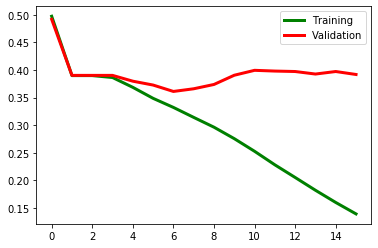

In [8]:
fig, ax = plt.subplots(1,1)


depths_arr = np.arange(0, depths)
ax.plot(depths_arr, training_error_rates, "g-", lw=3, label = "Training")
ax.plot(depths_arr, validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.show()

Higher max depth means higher complexity. The best max depth is 5 according to this graph

## Problem 2 - Part 4

In [9]:

min_parents = np.logspace(0,13,num=13,base=2,dtype='int')
min_parents_training_error_rates = np.zeros(len(min_parents))
min_parents_validation_error_rates = np.zeros(len(min_parents))




for index,min_parent in enumerate(min_parents):
    learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=min_parent, maxDepth=50)
    Ytr_hat = learner.predict(Xtr)
    Yva_hat = learner.predict(Xva)

    err_train = mse(Ytr, Ytr_hat)
    err_validate = mse(Yva, Yva_hat)
    
    # save error rates
    min_parents_training_error_rates[index] = err_train
    min_parents_validation_error_rates[index] = err_validate
    
    #print(err_validate)



[0.39234708 0.38992185 0.39423336 0.40393425 0.3947723  0.38453247
 0.3772568  0.38399353 0.36566963 0.37483158 0.37806521 0.49178119
 0.49178119]


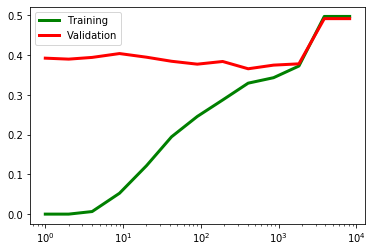

In [10]:

print(min_parents_validation_error_rates)
fig, ax = plt.subplots(1,1)


ax.semilogx(min_parents, min_parents_training_error_rates, "g-", lw=3, label = "Training")
ax.semilogx(min_parents, min_parents_validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.show()

Higher `minParent` yields lower complexity because more data is "grouped" together due to a higher number of data required to split nodes. The best `minParent` is around 400.  

## Problem 2 - Part 5

In [11]:
min_leaves = np.logspace(0,13,num=13,base=2,dtype='int')
min_leaves_training_error_rates = np.zeros(len(min_leaves))
min_leaves_validation_error_rates = np.zeros(len(min_leaves))




for index,min_leaf in enumerate(min_leaves):
    learner = ml.dtree.treeClassify(Xtr, Ytr, minLeaf=min_leaf, maxDepth=50)
    Ytr_hat = learner.predict(Xtr)
    Yva_hat = learner.predict(Xva)

    err_train = mse(Ytr, Ytr_hat)
    err_validate = mse(Yva, Yva_hat)
    
    # save error rates
    min_leaves_training_error_rates[index] = err_train
    min_leaves_validation_error_rates[index] = err_validate





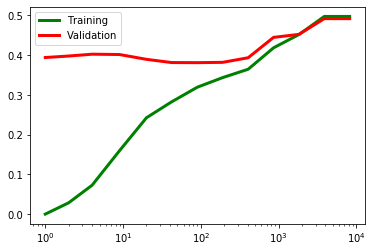

In [12]:
fig, ax = plt.subplots(1,1)


ax.semilogx(min_leaves, min_leaves_training_error_rates, "g-", lw=3, label = "Training")
ax.semilogx(min_leaves, min_leaves_validation_error_rates, "r-", lw=3, label = "Validation")

plt.legend()
plt.show()

Complexity control for `minLeaf` appears to be similar to `minParent`. 

## Problem 2 - Part 6

In [13]:
max_depth_learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=1,maxDepth=6)
min_parent_learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=406,maxDepth=50)
min_leaf_learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=1,minLeaf=90, maxDepth=50)
learner = ml.dtree.treeClassify(Xtr, Ytr, minParent=406, minLeaf=90, maxDepth=6)


depth_fpr_training,depth_tpr_training,depth_tnr_training = max_depth_learner.roc(Xtr,Ytr)
depth_fpr_validation,depth_tpr_validation,depth_tnr_validation = max_depth_learner.roc(Xva,Yva)

parent_fpr_training,parent_tpr_training,parent_tnr_training = min_parent_learner.roc(Xtr,Ytr)
parent_fpr_validation,parent_tpr_validation,parent_tnr_validation = min_parent_learner.roc(Xva,Yva)

leaf_fpr_training,leaf_tpr_training,leaf_tnr_training = min_leaf_learner.roc(Xtr,Ytr)
leaf_fpr_validation,leaf_tpr_validation,leaf_tnr_validation = min_leaf_learner.roc(Xva,Yva)

fpr_training,tpr_training,tnr_training = learner.roc(Xtr,Ytr)
fpr_validation,tpr_validation,tnr_validation = learner.roc(Xva,Yva)


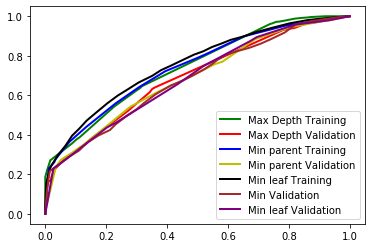

max depth auc training 0.7458140715013138
max depth auc validation 0.6962640363747294
min parent auc training 0.739186956183469
min parent auc validation 0.6866731068144512
min leaf auc training 0.7536670057445838
min leaf auc validation 0.679132468513488
min auc training 0.7204214030161677
min auc validation 0.6840154563546826


In [14]:

fig, ax = plt.subplots(1,1)


ax.plot(depth_fpr_training, depth_tpr_training, "g-", lw=2, label = "Max Depth Training")
ax.plot(depth_fpr_validation, depth_tpr_validation, "r-", lw=2, label = "Max Depth Validation")

ax.plot(parent_fpr_training, parent_tpr_training, "b-", lw=2, label = "Min parent Training")
ax.plot(parent_fpr_validation, parent_tpr_validation, "y-", lw=2, label = "Min parent Validation")


ax.plot(leaf_fpr_training, leaf_tpr_training, "black", lw=2, label = "Min leaf Training")
ax.plot(leaf_fpr_validation, leaf_tpr_validation, "brown", lw=2, label = "Min Validation")

ax.plot(fpr_validation, tpr_validation, "purple", lw=2, label = "Min leaf Validation")

plt.legend()
plt.show()

print(f"max depth auc training {max_depth_learner.auc(Xtr,Ytr)}")
print(f"max depth auc validation {max_depth_learner.auc(Xva,Yva)}")
print(f"min parent auc training {min_parent_learner.auc(Xtr,Ytr)}")
print(f"min parent auc validation {min_parent_learner.auc(Xva,Yva)}")
print(f"min leaf auc training {min_leaf_learner.auc(Xtr,Ytr)}")
print(f"min leaf auc validation {min_leaf_learner.auc(Xva,Yva)}")
print(f"min auc training {learner.auc(Xtr,Ytr)}")
print(f"min auc validation {learner.auc(Xva,Yva)}")

#print(f"min err for maxDepth {depths_arr[validation_error_rates == validation_error_rates.min()]}")
#print(f"min err for minParent {min_parents[min_parents_validation_error_rates == min_parents_validation_error_rates.min()]}")
#print(f"min err for minLeaf {min_leaves[min_leaves_validation_error_rates == min_leaves_validation_error_rates.min()]}")




## Problem 2 - Part 7

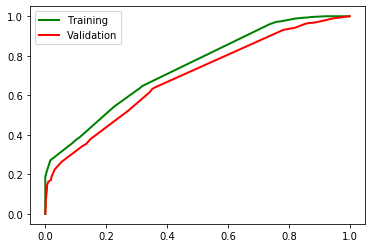

auc training 0.719523920669702
auc validation 0.7199156001685092


In [15]:
Xtr_kaggle = np.genfromtxt('data/X_train.txt', delimiter=',')
Ytr_kaggle = np.genfromtxt('data/Y_train.txt', delimiter=',')

Xtr_kaggle = Xtr_kaggle[:,:41]

Xtr_kaggle,Ytr_kaggle = ml.shuffleData(Xtr_kaggle,Ytr_kaggle)

final_learner = ml.dtree.treeClassify(Xtr_kaggle, Ytr_kaggle, minParent=406, minLeaf=90, maxDepth=6)

fig, ax = plt.subplots(1,1)


ax.plot(depth_fpr_training, depth_tpr_training, "g-", lw=2, label = "Training")
ax.plot(depth_fpr_validation, depth_tpr_validation, "r-", lw=2, label = "Validation")

plt.legend()
plt.show()

print(f"auc training {final_learner.auc(Xtr,Ytr)}")
print(f"auc validation {final_learner.auc(Xva,Yva)}")

In [16]:


Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Yte = np.vstack((np.arange(Xte.shape[0]), final_learner.predictSoft(Xte)[:,1])).T

np.savetxt('Y_submit.txt', Yte,'%d, %.2f', header='Id,Predicted', delimiter=',')

Performance on Kaggle: 0.70720

# Problem 3

## Problem 3 - Part 1

In [17]:
import mltools as ml

X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')

X,Y = ml.shuffleData(X,Y)

X = X[:,:41]

Xtr, Xva, Ytr, Yva = ml.splitData(X,Y,0.5)


In [18]:
class BaggedTree(ml.base.classifier):
    def __init__(self, learners):
        """Constructs a BaggedTree class with a set of learners. """
        self.learners = learners
    
    def predictSoft(self, X):
        """Predicts the probabilities with each bagged learner and average over the results. """
        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)

bootstrap_sample_size = 50

m,n = Xtr.shape

bag_numbers = np.array([1,5,10,25,50,75,125])

#ensemble_predictions = np.zeros(len(bag_numbers))

ensemble_training_errors = np.zeros(len(bag_numbers))
ensemble_validation_errors = np.zeros(len(bag_numbers))

for predictions_index, num_bags in enumerate(bag_numbers):
    classifiers = [None]*num_bags

    for i in range(num_bags):
        #index = np.floor(m*np.random.rand(bootstrap_sample_size).astype(int))
        #Xi, Yi = Xtr[index:], Ytr[index]
        Xi,Yi = ml.bootstrapData(Xtr, Ytr)
        classifiers[i] = ml.dtree.treeClassify(Xi, Yi, minParent=10, minLeaf=4, maxDepth=20)


    bagged_tree = BaggedTree(classifiers)
    bagged_tree.classes = np.unique(Y)
    ensemble_training_errors[predictions_index] = bagged_tree.err(Xtr,Ytr)
    ensemble_validation_errors[predictions_index] = bagged_tree.err(Xva,Yva)
    
    #m_test = Xva.shape[0]
    #predictions = np.zeros((m_test,num_bags))
    #for i in range(num_bags):
    #    predictions[:,i]=classifiers[i].predict(Xva)
    
    
    #print(predictions)
    #print(np.mean(predictions,axis=1))
    #prediction = np.mean(predictions,axis=1) > 0
    #print(prediction)
    # ensemble_predictions[predictions_index] = prediction
    
    #print(f"finished {num_bags}")
    


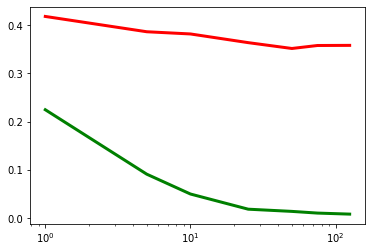

In [19]:
fig, ax = plt.subplots(1,1)

ax.semilogx(bag_numbers, ensemble_training_errors, "g-", lw=3, label = "Training")
ax.semilogx(bag_numbers, ensemble_validation_errors, "r-", lw=3, label = "Validation")


plt.show()

## Problem 3 - Part 2

In [21]:
Xtr_kaggle = np.genfromtxt('data/X_train.txt', delimiter=',')
Ytr_kaggle = np.genfromtxt('data/Y_train.txt', delimiter=',')

Xtr_kaggle = Xtr_kaggle[:,:41]

Xtr_kaggle,Ytr_kaggle = ml.shuffleData(Xtr_kaggle,Ytr_kaggle)

final_num_bags = 50
final_classifiers = [None]*final_num_bags

for i in range(final_num_bags):
    Xi,Yi = ml.bootstrapData(Xtr_kaggle, Ytr_kaggle)
    classifiers[i] = ml.dtree.treeClassify(Xi, Yi, minParent=2**6, minLeaf=4, maxDepth=20)


kaggle_bagged_tree = BaggedTree(classifiers)
kaggle_bagged_tree.classes = np.unique(Ytr_kaggle)



In [ ]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
Yte_ensemble = np.vstack((np.arange(Xte.shape[0]), kaggle_bagged_tree.predictSoft(Xte)[:,1])).T

np.savetxt('Y_submit_ensemble.txt', Yte,'%d, %.2f', header='Id,Predicted', delimiter=',')

Performance on Kaggle: 0.69596

# Problem 4

Talked with Patrick Lee and Corey Tan to better understand how ensembles work, as well as documentation for `dtree`